## Imports

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from mlxtend.plotting import plot_confusion_matrix

In [6]:
np.set_printoptions(threshold=np.inf)
admission_df = pd.DataFrame({'Age':[20, 18, 11, 31, 22, 21, 13, 15, 16, 17],
                             "likeRowing": [1, 1, 0, 0, 1, 1, 1, 1, 0, 1],
                             "RowingExperience": [0, 1, 1, 0, 1, 0, 0, 1, 1, 0],
                             "Income": [20, 33, 21, 9, 7, 10, 23, 16, 15, 6],
                             "y": [0, 0, 1, 1, 1, 0, 1, 0, 1, 0]})
print(admission_df)

   Age  likeRowing  RowingExperience  Income  y
0   20           1                 0      20  0
1   18           1                 1      33  0
2   11           0                 1      21  1
3   31           0                 0       9  1
4   22           1                 1       7  1
5   21           1                 0      10  0
6   13           1                 0      23  1
7   15           1                 1      16  0
8   16           0                 1      15  1
9   17           1                 0       6  0


# Let's evaluate the following two different classifiers: 

1. g(**x**) = **wx** + wo
2. f(**x**) = tanh(**wx** + wo)

where **w** = (0.05, −3, 2.1, 0.008), w0 = 0.3

In [15]:
w = np.array([0.05, -3, 2.1, 0.008])
w0 = 0.3

def g(x):
    return np.dot(w,x) + w0

def f(x):
    return math.tanh(np.dot(w,x) + w0)

def classify(g, threshold):
    if g<=threshold:
        return 0
    else:
        return 1
    
def compute_error(minimum, maximum, col):
    thresholds = np.arange(math.floor(minimum) - 1, math.ceil(maximum) + 1, 0.001)
    errors = []
    for t in thresholds:
        predictions = np.array(admission_df[col].apply(classify, args=(t,)))
        labels = np.array(admission_df['y'])
        error = 1 - (np.equal(labels, predictions).sum())/admission_df[col].count()
        errors.append(error)
    
    return thresholds, errors

def find_min_threshold(thresholds, errors):
    min_val = np.min(errors)
    indices = np.where(errors == min_val)
    last_index = indices[0][-1]
    return thresholds[last_index]

def assign_conf_matrix_labels(label, prediction):
    if label == 0 and prediction == 0:
        return 'TN'
    if label == 0 and prediction == 1:
        return 'FP'
    if label == 1 and prediction == 0:
        return 'FN'
    if label == 1 and prediction == 1:
        return 'TP'
    
def create_conf_matrix(df):
    conf_matrix_arr = list(df.apply(lambda row: assign_conf_matrix_labels(row['y'], row['ŷ']), axis=1))
    tp = conf_matrix_arr.count('TP')
    fp = conf_matrix_arr.count('FP')
    fn = conf_matrix_arr.count('FN')
    tn = conf_matrix_arr.count('TN')
    recall = tp/(tp+fn)
    precision = tp/(tp+fp) if tp != 0 else 0
    fpr = fp/(fp + tn)
    f1_score = 2*((precision*recall)/(precision+recall)) if precision + recall != 0 else 0
    conf_matrix = np.array([[tp, fp],
                       [fn, tn]])
    
    return  conf_matrix, recall, precision, fpr, f1_score

def plot_roc(thresholds, df, vals_col_name):
    tpr_vals = []
    fpr_vals = []
    for t in thresholds:
        df['ŷ'] = df[vals_col_name].apply(classify, args=(t,))
        conf_matrix, recall, precision, fpr, f1_score = create_conf_matrix(df)
        tpr_vals.append(recall)
        fpr_vals.append(fpr)
    
    plt.plot(fpr_vals, tpr_vals)
    plt.title(f'ROC Curve for {vals_col_name[0]}')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()
    plt.clf()

    return fpr_vals, tpr_vals

def calculate_auc(fpr_vals, tpr_vals):
    steps = len(fpr_vals)
    area = 0
    for i in range(1, steps):
        delta_x = fpr_vals[i] - fpr_vals[i-1]
        f_x = tpr_vals[i-1]
        area += delta_x*f_x
    return area
    

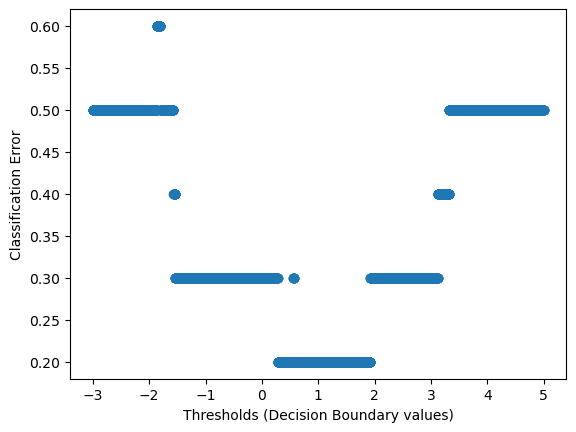

The maximum threshold that minimizes error = 1.921999999999458


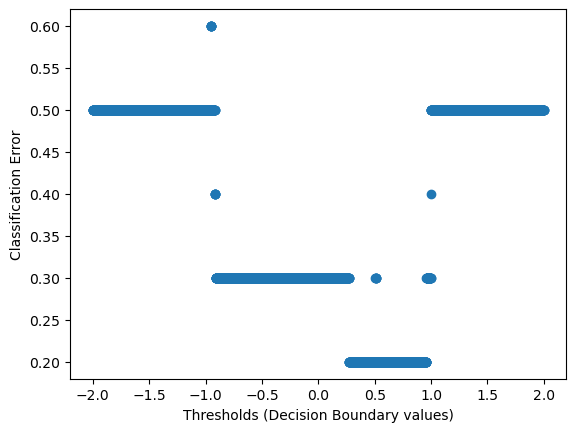

The maximum threshold that minimizes error = 0.9579999999996742


In [16]:
#Calculating values for both g and f classifiers
admission_df['g_values'] = admission_df.iloc[:, :4].apply(g, axis=1)
admission_df['f_values'] = admission_df.iloc[:, :4].apply(f, axis=1)

#Calculating threshold for g and f classifiers
thresholds_g, errors_g = compute_error(np.min(admission_df['g_values']), np.max(admission_df['g_values']), 'g_values')

plt.scatter(thresholds_g, errors_g)
plt.xlabel('Thresholds (Decision Boundary values)')
plt.ylabel('Classification Error')
plt.show()

min_error_max_threshold = find_min_threshold(thresholds_g, errors_g)
print(f'The maximum threshold that minimizes error = {min_error_max_threshold}')

thresholds_f, errors_f = compute_error(np.min(admission_df['f_values']), np.max(admission_df['f_values']), 'f_values')

plt.scatter(thresholds_f, errors_f)
plt.xlabel('Thresholds (Decision Boundary values)')
plt.ylabel('Classification Error')
plt.show()

min_error_max_threshold = find_min_threshold(thresholds_f, errors_f)
print(f'The maximum threshold that minimizes error = {min_error_max_threshold}')

### Computing some evaluation metrics for f classifier for min_error_max_threshold

   Age  likeRowing  RowingExperience  Income  y  g_values  f_values  ŷ
0   20           1                 0      20  0    -1.540 -0.912120  0
1   18           1                 1      33  0     0.564  0.510939  0
2   11           0                 1      21  1     3.118  0.996092  1
3   31           0                 0       9  1     1.922  0.958082  1
4   22           1                 1       7  1     0.556  0.505004  0
5   21           1                 0      10  0    -1.570 -0.917026  0
6   13           1                 0      23  1    -1.866 -0.953230  0
7   15           1                 1      16  0     0.278  0.271053  0
8   16           0                 1      15  1     3.320  0.997389  1
9   17           1                 0       6  0    -1.802 -0.947013  0
Recall TP/TP+FN =  0.6
Precision TP/TP+FP =  1.0
F1-score =  0.7499999999999999


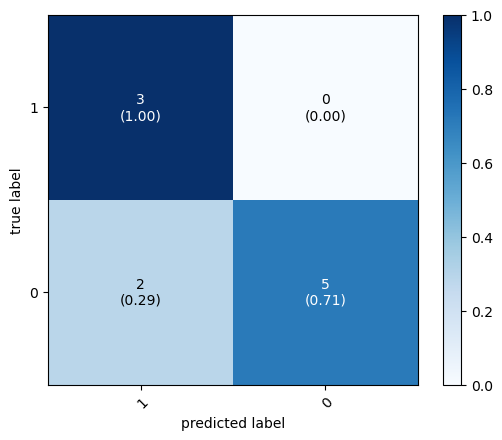

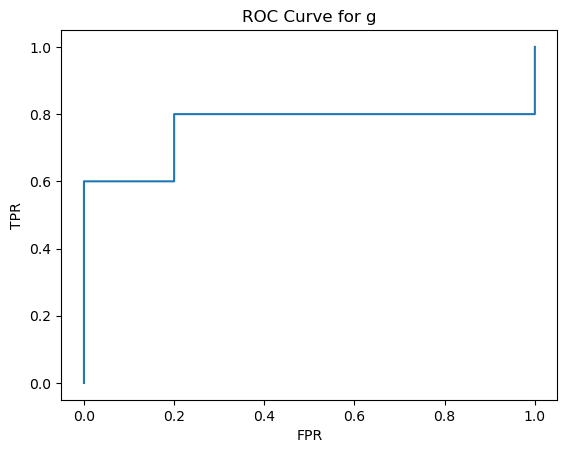

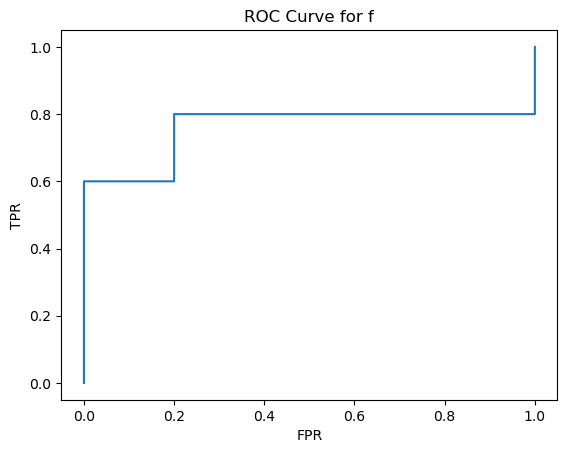

0.76 0.76


<Figure size 640x480 with 0 Axes>

In [22]:
admission_df['ŷ'] = admission_df['f_values'].apply(classify, args=(min_error_max_threshold,))
print(admission_df)

conf_matrix, recall, precision, fpr, f1_score = create_conf_matrix(admission_df)

print('Recall TP/TP+FN = ', recall)
print('Precision TP/TP+FP = ', precision)
print('F1-score = ', f1_score)

classes = ['1', '0']

figure, ax = plot_confusion_matrix(conf_mat = conf_matrix,
                                   class_names = classes,
                                   show_absolute = True,
                                   show_normed = True,
                                   colorbar = True)

plt.show()

fpr_vals_g, tpr_vals_g = plot_roc(thresholds_g, admission_df, 'g_values')
fpr_vals_f, tpr_vals_f = plot_roc(thresholds_f, admission_df, 'f_values')

fpr_vals_g.sort()
fpr_vals_f.sort()
tpr_vals_g.sort()
tpr_vals_f.sort()

auc_g = calculate_auc(fpr_vals_g, tpr_vals_g)
auc_f = calculate_auc(fpr_vals_f, tpr_vals_f)

print(auc_g, auc_f)